# K-nearest neighbors (KNN)

- Modelo de clasificación no lineal.
- Es un modelo que ofrece facilidades en cuanto a su implementación.
- No requiere el cálculo de parámetros en el entrenamiento.



Para este clasificador se usa la base de datos iris








In [1]:
from sklearn.datasets import load_iris
%matplotlib inline
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
iris = load_iris(as_frame=True)
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


### 1. Intuición del modelo KNN

1. Suponer que se tiene el problema de clasificación el tipo de flor iris con base en sus características morfológicas. Además, considere que se tiene el siguiente conjunto de entrenamiento.

In [3]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values 
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
N = len(y_train)

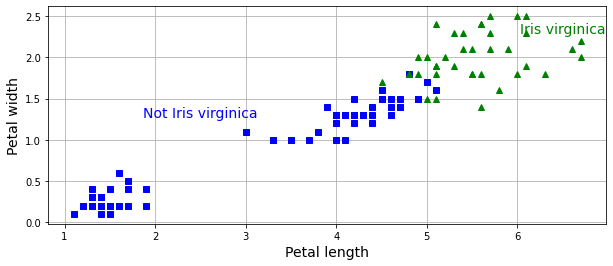

In [4]:
plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
plt.text(2.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.show()

2. Ahora suponer que se tienen los datos de una nueva flor. Se quiere verificar si la flor pertenece a la especie Virginica. La nueva flor tiene los siguientes atributos:

    Petal length = 6.5

    Petal Width  = 1.5

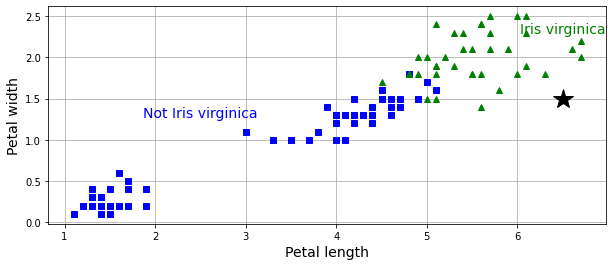

In [25]:
plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
plt.plot(6.5, 1.5, "k*", markersize=20)
plt.text(2.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.show()

3. Ahora la idea es calcular la similitud entre el nuevo dato y **TODOS** los datos de entrenamiento. Una herramienta usada es la distancia euclidiana. Así mientras dicha distancia sea menor, existirá mayor grado de similitud. Luego se organizan las distancias en orden ascendente.

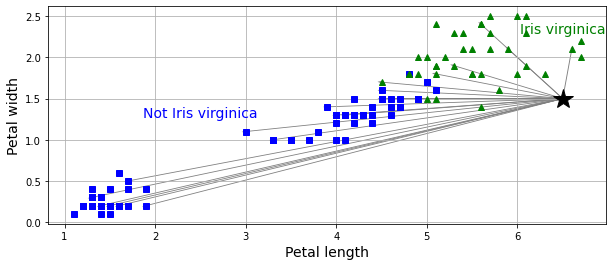

In [26]:
plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
plt.plot(6.5, 1.5, "k*", markersize=20)
plt.text(2.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
Idx = np.random.permutation(N)
for j in range(int(N/5)):
  x, y = 6.5, 1.5
  dx = X_train[Idx[j], 0]-x
  dy = X_train[Idx[j], 1]-y
  plt.arrow(x=x, y=y, dx=dx, dy=dy, width=0.01, facecolor='gray', edgecolor='none')
plt.grid()
plt.show()

In [27]:
#Se calculan as distancias al punto nuevo.
D = np.zeros(N)
for j in range(N):
  D[j] = np.sqrt((X_train[j, 0]-x)**2 + (X_train[j, 1]-y)**2)
Idx_sorted = np.argsort(D)

4. Ahora, se eligen las primeras $k$ muestras. Estas son las que comparten mayor similitud con el nuevo dato. Para efectos demostrativos, se asume que $k=5$

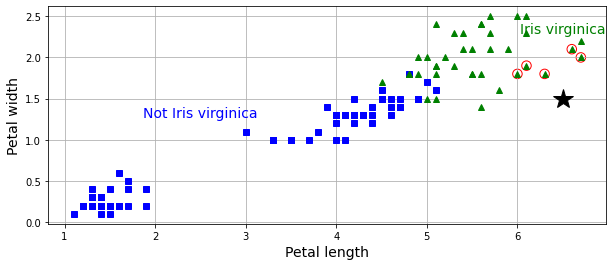

In [28]:
k = 5
plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
plt.plot(6.5, 1.5, "k*", markersize=20)
plt.text(2.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
for j in range(k):
  plt.scatter(X_train[Idx_sorted[j], 0], X_train[Idx_sorted[j], 1], s=90, facecolors='none', edgecolors='r')
plt.grid()
plt.show()

5. Finalmente, se tiene en cuenta la variable de salida de los k vecinos más cercanos. Así, la predicción del nuevo dato corresponde a la etiqueta más votada entre los vecinos más cercanos, en otras palabras, se calcula la moda de las etiquetas.

In [29]:
print([y_train[Idx_sorted[j]] for j in range(k)])

[True, True, True, True, True]


En este ejemplo particular, la etiqueta más votada es "True", lo cual corresponde a la clase iris virginica.

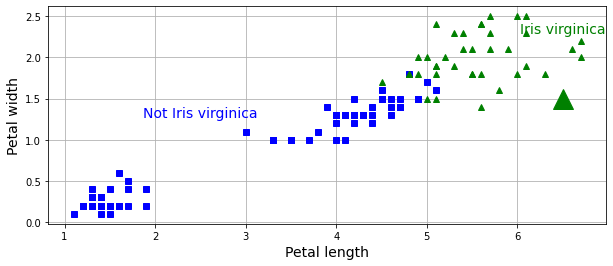

In [30]:
k = 5
plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
plt.plot(6.5, 1.5, "g^", markersize=20)
plt.text(2.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.show()

### 2. Parámetros libres (Hiperparámetros)

- n_neighbors: número de vecinos. Un valor de $k=1$ hace que el modelo sea menos estable y que sea propenso al sobre ajuste. Por el contrario, un valor grande hace que el modelo sea más estable generando fronteras de decisión suaves. Para casos de clasificación binaria se recomienda usar un valor impar para este parámetro. ¿Por qué?

- weights: se emplea para asignarle más importancia a ciertas muestras. La mejor opción dependerá de la base de datos.

- algorithm: El algoritmo empleado para la búsqueda de los vecinos más cercanos. 

- leaf_size: parámetro usado para el algoritmo de búsqueda, no afecta los resultados de clasificación. Tiene efecto sobre el tiempo de ejecución del algoritmo. 

- p: párametro para la métrica [Minkowski](https://en.wikipedia.org/wiki/Minkowski_distance). Se suele usar p=1 o p=2 (distancia Euclidiana)


In [11]:
# Este código tiene la intención de graficar regiones de decisión
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = np.round(clf.predict(X).reshape(x0.shape))

    return x0, x1, y_pred
    # y_decision = clf.decision_function(X).reshape(x0.shape)
    # plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    # plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

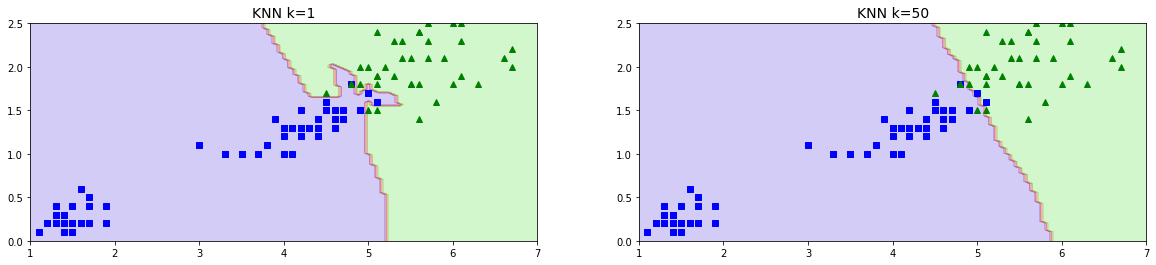

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(20, 4))
for j, n_neighbors in enumerate([1, 50]):
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors)
    clf.fit(X_train, y_train)

    ax[j].plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
    ax[j].plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
    x0, x1, y_pred = plot_predictions(clf, [1, 7, 0, 2.5])
    ax[j].contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    ax[j].set_title('KNN' + ' k=' + str(n_neighbors))
    

plt.show()